# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/AN2DL_Challenge1/public_data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/AN2DL_Challenge1/public_data


### Imports

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [ ]:
# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading the data

In [ ]:
loaded=np.load('public_data.npz', allow_pickle=True)
data=loaded['data']
labels=loaded['labels']

new_data=[]
new_labels=[]
shrek=data[58] # saving an image of Shrek
person=data[529] # saving an image of Trololo

## Cleaning the dataset and saving the new datset

In [ ]:
# Removing every image of Shrek and Trololo from the dataset
for i in range(len(data)):
  if not(np.array_equal(data[i],shrek) or np.array_equal(data[i],person)):
    new_data.append(data[i])
    new_labels.append(labels[i])

new_data= np.array(new_data)
new_labels=np.array(new_labels)

# Creating a new npz file with the clean data
np.savez('clean_public_data', **{'data':new_data, 'labels':new_labels})

(array([3101.,    0., 1903.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

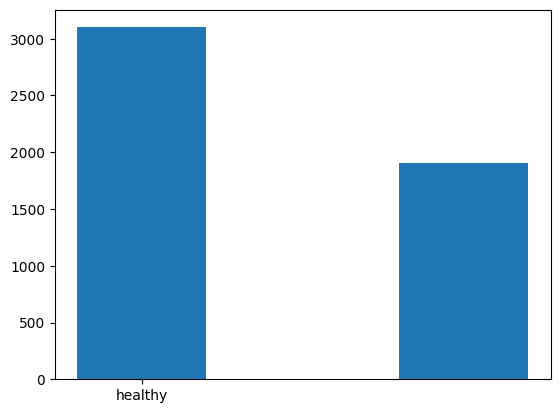

In [ ]:
plt.hist(labels, bins=3, align='left', rwidth=0.8)